# Market Maker Risk Analysis: Understanding Price Impact and Informed Trading

This notebook explores the mathematical model from Section 1.3.3 of "Trades, Quotes and Prices" by Bouchaud et al., breaking down how market makers face risks from informed traders and why their returns show specific statistical properties.

## Setup and Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Understanding Permanent Price Impact (R_inf)

In market microstructure, we distinguish between temporary price impacts (like bid-ask bounce) and permanent impacts (true information). R_inf represents the long-term price change after all transient effects settle.

The model assumes:
- With probability φ (phi), a trader is "informed" and knows of a true price jump ±J
- With probability (1-φ), a trader is "uninformed" with no price impact

Therefore: R_inf = φJ

Let's visualize this relationship:

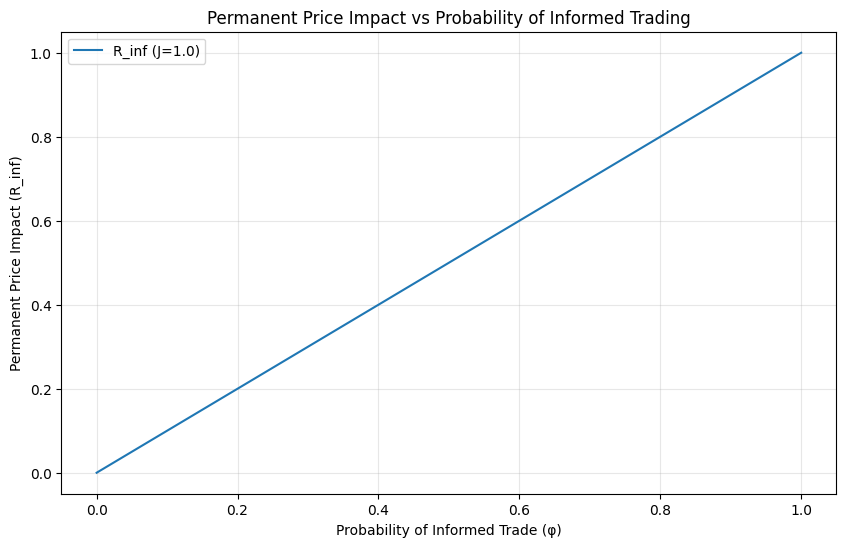

In [3]:
def plot_price_impact(J=1.0):
    phi = np.linspace(0, 1, 100)
    R_inf = phi * J
    
    plt.figure(figsize=(10, 6))
    plt.plot(phi, R_inf, label=f'R_inf (J={J})')
    plt.xlabel('Probability of Informed Trade (φ)')
    plt.ylabel('Permanent Price Impact (R_inf)')
    plt.title('Permanent Price Impact vs Probability of Informed Trading')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
plot_price_impact()

## 2. Market Maker's Spread (s)

The market maker sets a symmetric spread around the true price:
- Bid price = P - s/2 (where MM buys)
- Ask price = P + s/2 (where MM sells)

For break-even, they need: s = 2φJ

Let's visualize the spread structure:

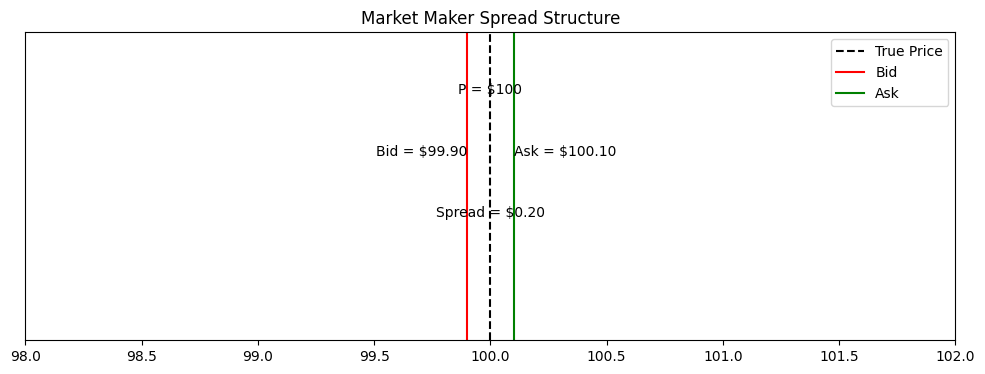

In [4]:
def plot_spread_structure(P=100, phi=0.1, J=1.0):
    s = 2 * phi * J
    bid = P - s/2
    ask = P + s/2
    
    fig, ax = plt.subplots(figsize=(12, 4))
    
    # Plot price levels
    ax.axvline(x=P, color='black', linestyle='--', label='True Price')
    ax.axvline(x=bid, color='red', label='Bid')
    ax.axvline(x=ask, color='green', label='Ask')
    
    # Add annotations
    ax.text(P, 0.8, f'P = ${P}', horizontalalignment='center')
    ax.text(bid, 0.6, f'Bid = ${bid:.2f}', horizontalalignment='right')
    ax.text(ask, 0.6, f'Ask = ${ask:.2f}', horizontalalignment='left')
    ax.text(P, 0.4, f'Spread = ${s:.2f}', horizontalalignment='center')
    
    # Customize plot
    ax.set_ylim(0, 1)
    ax.set_xlim(P-2, P+2)
    ax.set_yticks([])
    ax.set_title('Market Maker Spread Structure')
    ax.legend()
    
plot_spread_structure()

## 3. Market Maker's Risk Profile

### 3.1 Variance

The variance of MM's gain per trade is: σ²_MM = (1-φ)×0 + φJ² = φJ²

This shows how uncertainty in MM's returns increases with both:
- Probability of informed trading (φ)
- Size of potential price jumps (J)
  
Note: Total variance and informed component lines overlap because uninformed traders contribute zero variance (σ²_MM = φJ²)

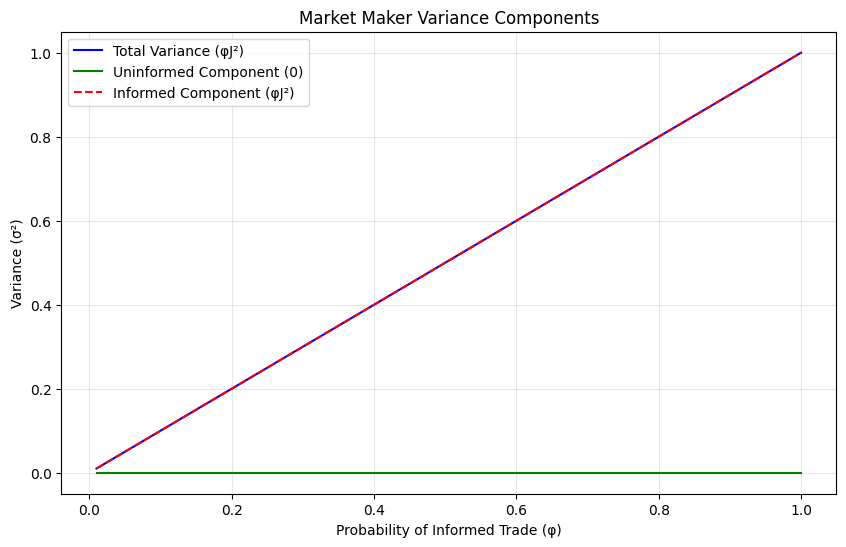

In [6]:
def plot_variance(J=1.0):
    phi = np.linspace(0.01, 1, 100)
    variance = phi * J**2
    uninformed = np.zeros_like(phi)
    informed = phi * J**2
    
    plt.figure(figsize=(10, 6))
    plt.plot(phi, variance, label='Total Variance (φJ²)', color='blue')
    plt.plot(phi, uninformed, label='Uninformed Component (0)', color='green')
    plt.plot(phi, informed, '--', label='Informed Component (φJ²)', color='red')
    
    plt.xlabel('Probability of Informed Trade (φ)')
    plt.ylabel('Variance (σ²)')
    plt.title('Market Maker Variance Components')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
plot_variance()

### 3.2 Skewness

The skewness of MM's gains is: γ_MM = -1/√φ

This shows the "insurance-like" nature of market making:
- Most trades (uninformed) generate small profits
- Rare trades (informed) generate large losses
- As φ→0, skewness becomes extremely negative

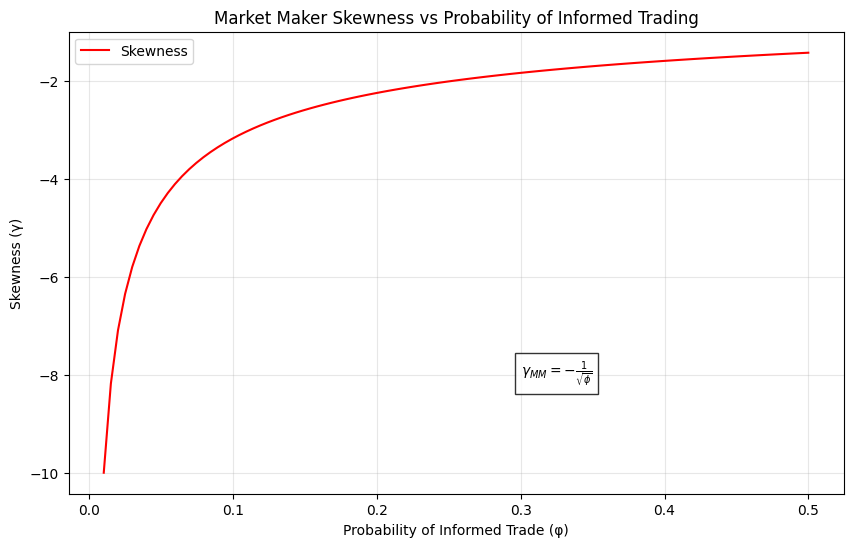

In [7]:
def plot_skewness():
    phi = np.linspace(0.01, 0.5, 100)
    skewness = -1 / np.sqrt(phi)
    
    plt.figure(figsize=(10, 6))
    plt.plot(phi, skewness, label='Skewness', color='red')
    
    plt.xlabel('Probability of Informed Trade (φ)')
    plt.ylabel('Skewness (γ)')
    plt.title('Market Maker Skewness vs Probability of Informed Trading')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Add equation
    plt.text(0.3, -8, r'$\gamma_{MM} = -\frac{1}{\sqrt{\phi}}$', 
             bbox=dict(facecolor='white', alpha=0.8))
    
plot_skewness()

## 4. Conclusion

This model illustrates key aspects of market making:

1. Market makers must set spreads proportional to both:
   - Probability of informed trading (φ)
   - Size of potential price jumps (J)

2. Their risk profile shows:
   - Variance increases linearly with φ
   - Skewness becomes extremely negative as φ→0

3. The business is similar to selling insurance:
   - Collect small premiums (spread) from many trades
   - Occasionally pay large losses to informed traders
   - Need sophisticated risk management strategies

This helps explain why market makers need careful risk management and why liquidity can be fragile during periods of high uncertainty.